<a href="https://colab.research.google.com/github/Gcango/Analise_Exploratorio_dos_Dados_da_TopSeles/blob/main/Analise_Exploratoria_TopSeles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Este é um desafio Adaptado, cujo objectivo é a exploração dos dados com base nos parametros de analise de dados.

Problema: ToSeles é uma empresa de vendas, pretende fazer uma analise exploratória dos seus dados no periodo de 2020 e 2021. Para tal empreitada o grupo de gestores da TOPSELES definiu algumas questões encontradas no desenrolar deste documento.

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

In [2]:
dados = pd.read_csv("/content/sales.csv", low_memory=False)

In [3]:
dados.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571.0,South,jwtitus,0.0
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571.0,South,jwtitus,0.0
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1199.2,0.0,1199.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571.0,South,jwtitus,0.0
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,639.2,0.0,639.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571.0,South,jwtitus,0.0
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.0,99.9,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571.0,South,jwtitus,0.0


In [4]:
dados.tail(5)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
16972,100358645,2020-10-21,canceled,581714.0,MATXIA59AC86FE21CBB,2.0,222.2,222.2,0.0,222.2,...,462-99-0324,303-516-9072,Denver,Denver,Denver,CO,80205.0,West,mgkimmons,0.0000
16973,100358649,2020-10-21,order_refunded,581719.0,MATXIA59BAB2491C0B7,2.0,222.2,222.2,0.0,222.2,...,462-99-0324,303-516-9072,Denver,Denver,Denver,CO,80205.0,West,mgkimmons,0.0000
16974,100358954,2020-10-23,complete,582266.0,MATXIA59BAB2491C0B7,1.0,222.2,0.0,0.0,0.0,...,462-99-0324,303-516-9072,Denver,Denver,Denver,CO,80205.0,West,mgkimmons,9.0009
16975,100364614,2020-11-12,canceled,591514.0,COMA4T59D5F528792CE,2.0,79.9,79.9,0.0,79.9,...,462-99-0324,303-516-9072,Denver,Denver,Denver,CO,80205.0,West,mgkimmons,0.0000
16976,100364614,2020-11-12,canceled,591515.0,MATYUN59D77E89017C9,2.0,58.0,58.0,0.0,58.0,...,462-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16977 entries, 0 to 16976
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          16977 non-null  int64  
 1   order_date        16977 non-null  object 
 2   status            16977 non-null  object 
 3   item_id           16977 non-null  float64
 4   sku               16977 non-null  object 
 5   qty_ordered       16977 non-null  float64
 6   price             16977 non-null  float64
 7   value             16977 non-null  float64
 8   discount_amount   16977 non-null  float64
 9   total             16977 non-null  float64
 10  category          16977 non-null  object 
 11  payment_method    16977 non-null  object 
 12  bi_st             16977 non-null  object 
 13  cust_id           16977 non-null  float64
 14  year              16977 non-null  int64  
 15  month             16977 non-null  object 
 16  ref_num           16977 non-null  int64 

In [6]:
print(f" Esta Base de dados contem {dados.shape[0]} linhas e {dados.shape[1]} ")

 Esta Base de dados contem 16977 linhas e 36 


In [7]:
#Exibição das colunas por completo
pd.set_option('display.max_columns', None)
dados.sample(5)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Name Prefix,First Name,Middle Initial,Last Name,Gender,age,full_name,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
13492,100462543,2021-03-27,canceled,758954.0,OTHQMO5A8148F511A6C-15,3.0,105.0,210.0,0.0,210.0,Others,bankalfalah,Gross,1423.0,2021,Mar-2021,413587,Prof.,Alonso,R,Buettner,M,25.0,"Buettner, Alonso",alonso.buettner@hotmail.com,4/18/2016,515-31-9051,219-398-6543,Chandler,Warrick,Chandler,IN,47610.0,Midwest,arbuettner,0.0
3711,100360572,2020-10-31,order_refunded,585022.0,ENTAUD59C3A421EEF1C,2.0,239.0,239.0,0.0,239.0,Entertainment,cod,Valid,54100.0,2020,Oct-2020,464980,Prof.,Gavin,N,Shipley,M,28.0,"Shipley, Gavin",gavin.shipley@gmail.com,1/3/2016,144-23-1300,307-741-9382,Garrett,Albany,Garrett,WY,82058.0,West,gnshipley,0.0
16491,100385459,2020-12-20,complete,625452.0,MEFBNB59FC74FDBC09F-L,2.0,24.9,24.9,0.0,24.9,Men's Fashion,cod,Net,54862.0,2020,Dec-2020,951339,Mr.,Curt,Q,Styer,M,69.0,"Styer, Curt",curt.styer@gmail.com,1/11/1990,595-99-0430,209-739-6498,Glen Ellen,Sonoma,Glen Ellen,CA,95442.0,West,cqstyer,0.0
10988,100356088,2020-10-08,order_refunded,577418.0,jjp_15000006-100-NIL,2.0,328.5,328.5,0.0,328.5,Beauty & Grooming,cod,Valid,58354.0,2020,Oct-2020,625276,Mrs.,Meta,L,Ovellette,F,41.0,"Ovellette, Meta",meta.ovellette@outlook.com,4/26/1994,269-17-7202,262-953-4597,Boyceville,Dunn,Boyceville,WI,54725.0,Midwest,mlovellette,0.0
198,100535496,2021-06-29,order_refunded,859338.0,SOGALM5A8BD55CD82F1,2.0,22.5,22.5,0.0,22.5,Soghaat,cod,Valid,37011.0,2021,Jun-2021,182401,Dr.,Romeo,G,Hopps,M,38.0,"Hopps, Romeo",romeo.hopps@outlook.com,1/24/2013,698-16-4181,308-392-2413,Snyder,Dodge,Snyder,NE,68664.0,Midwest,rghopps,0.0


In [8]:
dados.isnull().sum()

order_id            0
order_date          0
status              0
item_id             0
sku                 0
qty_ordered         0
price               0
value               0
discount_amount     0
total               0
category            0
payment_method      0
bi_st               0
cust_id             0
year                0
month               0
ref_num             0
Name Prefix         0
First Name          0
Middle Initial      0
Last Name           0
Gender              0
age                 0
full_name           0
E Mail              0
Customer Since      0
SSN                 0
Phone No.           1
Place Name          1
County              1
City                1
State               1
Zip                 1
Region              1
User Name           1
Discount_Percent    1
dtype: int64

In [9]:
#1) - Confirma o Periodo da Base de dados da TOPSELES

In [10]:
dados.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Customer Since', 'SSN', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent'],
      dtype='object')

In [34]:

print(f" Esta Base de dados possui dados dos anos de {dados.year.unique()[0]} e {dados.year.unique()[1]}")

 Esta Base de dados possui dados dos anos de 2020 e 2021


In [12]:
#2) - Em que data específica a TOPSELES começou o processo de vendas e qual foi a sua Faturação?

In [14]:
data_inicio = dados.groupby(['order_date'])['total'].sum()
data_inicio

order_date
2020-10-01    219672.11100
2020-10-02     78931.49000
2020-10-03    254652.23035
2020-10-04    105074.33500
2020-10-05    124694.49800
                  ...     
2021-09-26     14747.30000
2021-09-27     14910.16000
2021-09-28      1064.50000
2021-09-29     10280.10000
2021-09-30      4056.00000
Name: total, Length: 362, dtype: float64

In [35]:
print(f" A TOPSELES começou o seu processo  de vendas em  {data_inicio.index[0]} \n e extima-se que na sua primeira venda faturou em torno de {data_inicio[0]} USD")

 A TOPSELES começou o seu processo  de vendas em  2020-10-01 
 e extima-se que na sua primeira venda faturou em torno de 219672.111 USD


In [16]:
#3) - Quais foram os periodos (meses e anos) em que houve vendas?

In [17]:
period_vendas = dados.groupby(['year', 'month'])['total'].sum()
print(f" Os periodos de vendas na TOPSELES são abaixos descriminados: ")
print(period_vendas)

 Os periodos de vendas na TOPSELES são abaixos descriminados: 
year  month   
2020  Dec-2020    1.948884e+06
      Nov-2020    9.288086e+05
      Oct-2020    2.397501e+06
2021  Apr-2021    1.020580e+06
      Aug-2021    3.697416e+05
      Feb-2021    3.125499e+05
      Jan-2021    3.828881e+05
      Jul-2021    2.292002e+05
      Jun-2021    5.019175e+05
      Mar-2021    9.549651e+05
      May-2021    5.697896e+05
      Sep-2021    3.115270e+05
Name: total, dtype: float64


In [18]:
#4) - No geral quantos dias de faturamento foram?

In [19]:
print(f"No geral, a TOPSALES teve {dados['order_date'].nunique()} dias de faturamento ")

No geral, a TOPSALES teve 362 dias de faturamento 


In [20]:
#5) - Quais são os clientes cadastrados na Base de Dados de acordo com os seus prefixos?

In [21]:
dados.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Customer Since', 'SSN', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent'],
      dtype='object')

In [22]:
prefixo = dados['Name Prefix'].unique()[0:7]
print(f"De acordo com os prefixos, os clientes da TOPSALES são: \n{prefixo}")
print(f"Isso nos leva afirmar que é frequentado por pessoas de diferentes extratos da sociedade")

De acordo com os prefixos, os clientes da TOPSALES são: 
['Drs.' 'Prof.' 'Mr.' 'Hon.' 'Ms.' 'Mrs.' 'Dr.']
Isso nos leva afirmar que é frequentado por pessoas de diferentes extratos da sociedade


In [ ]:
#6) - Quais produtos foram facilmente encontrar a vendas?

In [74]:
prodts = dados.groupby(['category'])['total'].count().sort_values(ascending=False)
prodts

category
Mobiles & Tablets     3543
Men's Fashion         2465
Women's Fashion       2449
Appliances            1669
Beauty & Grooming     1293
Superstore            1272
Soghaat                932
Home & Living          807
Entertainment          773
Health & Sports        485
Others                 434
Computing              370
Kids & Baby            353
School & Education      93
Books                   39
Name: total, dtype: int64

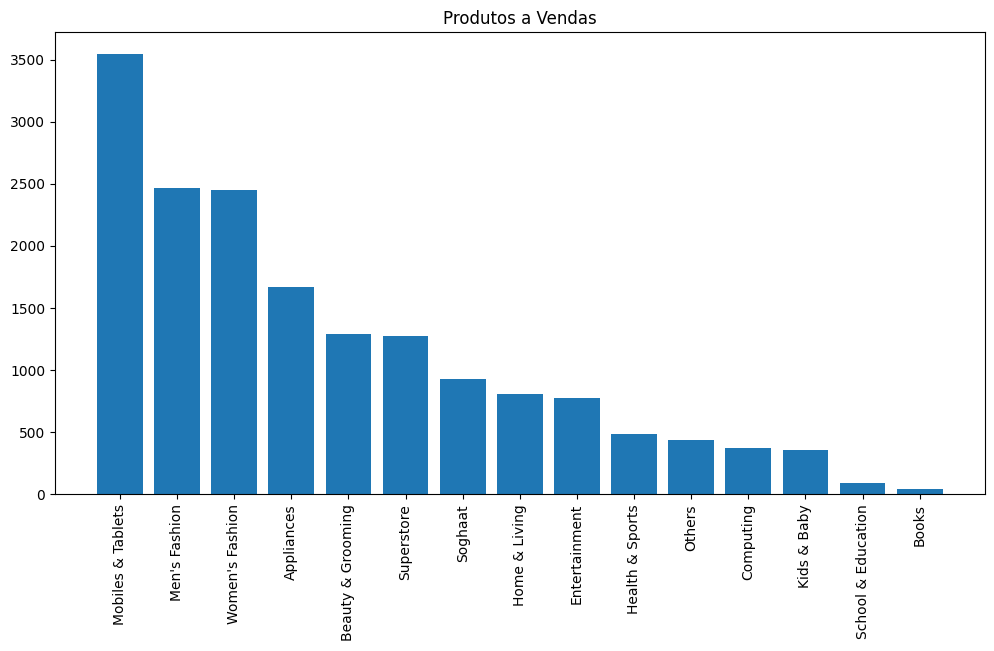

In [76]:
plt.figure(figsize=(12,6))
plt.bar(prodts.index, prodts.values)
plt.xticks(rotation=90)
plt.title('Produtos a Vendas')
plt.show()

In [91]:
print(f'Se consideramos um top 5 dos produtos mais vendido, podemos afirmar que são: \n {prodts.index[0:5]}')

Se consideramos um top 5 dos produtos mais vendido, podemos afirmar que são: 
 Index(['Mobiles & Tablets', 'Men's Fashion', 'Women's Fashion', 'Appliances',
       'Beauty & Grooming'],
      dtype='object', name='category')


In [ ]:
#6) - Qual foi o movimento financeiro dos produtos são mais vendidos?

In [97]:
prod_vendidos = dados.groupby(['category'])['total'].sum().reset_index().sort_values(by='total', ascending=False)
prod_vendidos

,category,total
9,Mobiles & Tablets,5.151344e+06
0,Appliances,1.417877e+06
4,Entertainment,1.227140e+06
14,Women's Fashion,6.755946e+05
8,Men's Fashion,3.474913e+05
1,Beauty & Grooming,3.141494e+05
3,Computing,3.109459e+05
13,Superstore,1.124038e+05
6,Home & Living,1.116701e+05
5,Health & Sports,9.859862e+04


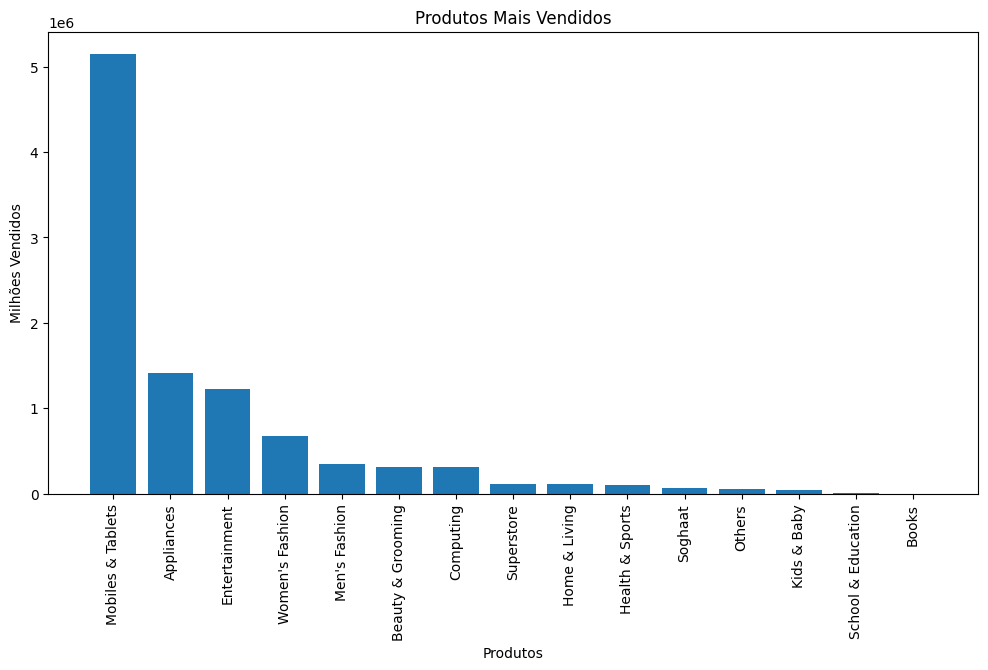

In [103]:
plt.figure(figsize=(12,6))
plt.bar(prod_vendidos.category, prod_vendidos.total)
plt.xticks(rotation=90)
plt.xlabel('Produtos')
plt.ylabel('Milhões Vendidos')
plt.title('Produtos Mais Vendidos')
plt.show()

In [117]:
px.bar(prod_vendidos, x='category', y='total')

In [23]:
#6) - Como é que esses clientes estão distribuidos por genero?

In [24]:
genero = dados['Gender'].value_counts()
print(f"Quanto ao genero são:{genero[0]} Homens e {genero[1]} Mulheres ")
data1 = genero[0]
data2 = genero[1]
dif = data1 - data2

Quanto ao genero são:8795 Homens e 8182 Mulheres 


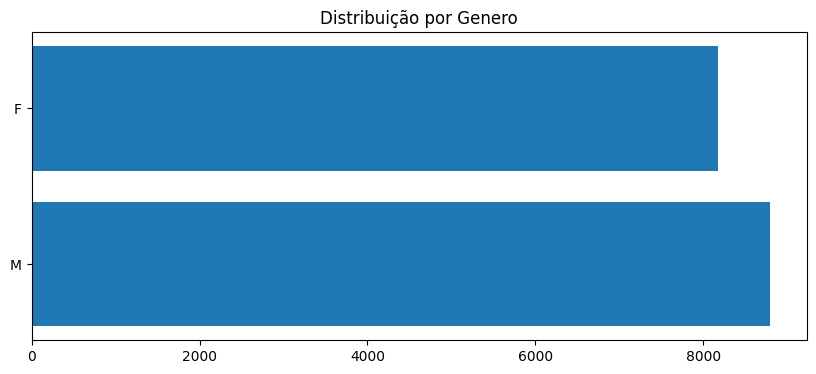

In [25]:
plt.figure(figsize=(10,4))
plt.barh(genero.index, genero.values)
plt.title('Distribuição por Genero')
plt.show()

In [26]:
print(f" A diferença entre Homens e Mulheres cadastrados na Base de dados é de {dif}")

 A diferença entre Homens e Mulheres cadastrados na Base de dados é de 613


In [ ]:
#7) - Como os Generos estão distribuidos quanto a compra?

In [27]:
#7) - Como estão distribuidos a questão de idade dos clientes?

In [28]:
idades = dados['age'].value_counts(ascending=False)#.reset_index()
idades.index.sort_values()

Float64Index([18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0,
              29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0,
              40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0,
              51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0,
              62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0,
              73.0, 74.0, 75.0],
             dtype='float64')

In [49]:
idades = dados['age'].value_counts(ascending=False).reset_index()
idades.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
index,64.0,31.0,40.0,62.0,59.0,68.0,30.0,28.0,63.0,38.0,36.0,69.0,22.0,47.0,67.0,25.0,35.0,73.0,51.0,24.0,60.0,55.0,57.0,46.0,56.0,72.0,32.0,50.0,45.0,43.0,52.0,53.0,18.0,54.0,21.0,20.0,41.0,49.0,29.0,66.0,42.0,27.0,19.0,39.0,34.0,61.0,75.0,74.0,70.0,26.0,65.0,33.0,58.0,44.0,48.0,71.0,37.0,23.0
age,778.0,764.0,635.0,625.0,585.0,569.0,521.0,456.0,456.0,420.0,414.0,404.0,390.0,389.0,388.0,378.0,365.0,355.0,335.0,317.0,316.0,309.0,303.0,299.0,287.0,283.0,277.0,274.0,262.0,258.0,248.0,237.0,235.0,222.0,209.0,208.0,207.0,200.0,182.0,170.0,168.0,160.0,154.0,153.0,150.0,147.0,143.0,142.0,141.0,139.0,136.0,134.0,130.0,128.0,126.0,112.0,108.0,76.0


In [30]:
#7) - Como podemos entender o estado das vendas dos produtor da TOPSELES

In [31]:
graf_estado = dados['status'].value_counts()
graf_estado

complete          5253
canceled          5173
received          3141
order_refunded    2765
refund             309
cod                230
paid                82
pending             11
closed               9
processing           2
pending_paypal       2
Name: status, dtype: int64

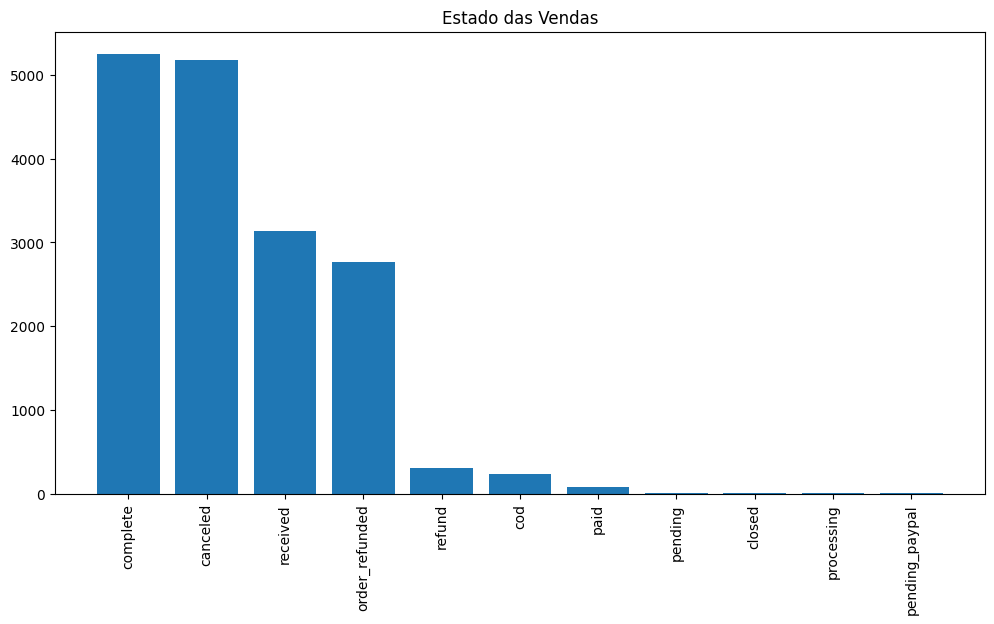

In [32]:
plt.figure(figsize=(12,6))
plt.bar(graf_estado.index, graf_estado.values)
plt.xticks(rotation=90)
plt.title('Estado das Vendas')
plt.show()

In [33]:
print(" O estado de compra na TOPSELES pode estar resumidos em 7 status predominantes:")
print(f" Staus {graf_estado.index[0]}  {graf_estado[0]}")
print(f" Staus {graf_estado.index[1]}  {graf_estado[1]}")
print(f" Staus {graf_estado.index[2]}  {graf_estado[2]}")
print(f" Staus {graf_estado.index[3]}  {graf_estado[3]}")
print(f" Staus {graf_estado.index[4]}  {graf_estado[4]}")
print(f" Staus {graf_estado.index[5]}  {graf_estado[5]}")
print(f" Staus {graf_estado.index[6]}  {graf_estado[6]}")


 O estado de compra na TOPSELES pode estar resumidos em 7 status predominantes:
 Staus complete  5253
 Staus canceled  5173
 Staus received  3141
 Staus order_refunded  2765
 Staus refund  309
 Staus cod  230
 Staus paid  82
